<a href="https://colab.research.google.com/github/mdishaq33/-Salt-and-Pepper-Noise-Reduction-in-Images/blob/main/Salt_and_Pepper_Noise_Reduction_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Salt and Pepper Noise Reduction in Images

Enter 'u' to upload image or 'g' to generate gradient image (default 'g'): g
Generated gradient image with shape: (100, 100)
Enter the probability of salt noise (0 to 1, e.g., 0.05): 0.05
Enter the probability of pepper noise (0 to 1, e.g., 0.05): 0.05
Enter the size of the median filter (odd integer, e.g., 3): 3
Images saved as 'original_image.npy', 'noisy_image.npy', and 'cleaned_image.npy'.
You can load them using numpy.load() and visualize externally.


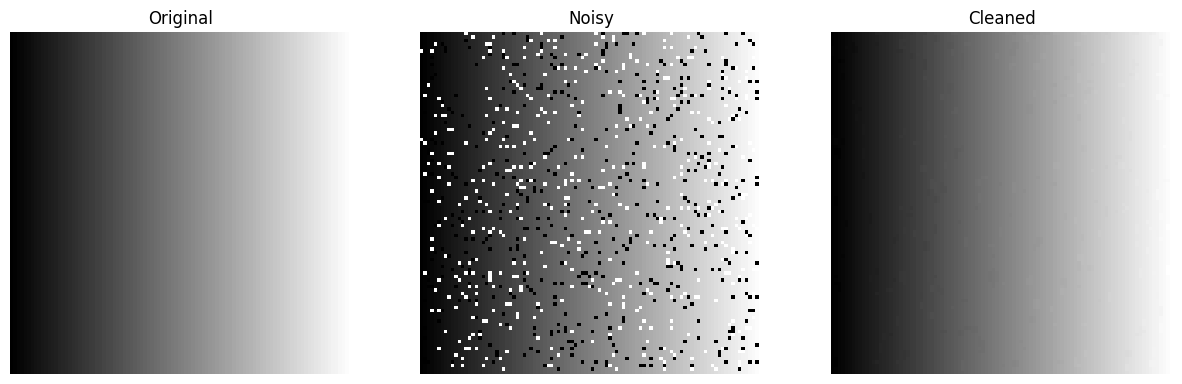

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
from google.colab import files

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    """
    Add salt and pepper noise to an image.
    salt_prob: Probability of salt noise
    pepper_prob: Pr
    obability of pepper noise
    """
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(np.ceil(salt_prob * total_pixels))
    num_pepper = int(np.ceil(pepper_prob * total_pixels))

    # Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

def median_filter(image, filter_size=3):
    """
    Apply a median filter to the input grayscale image using NumPy only.
    image: 2D numpy array
    filter_size: size of the square filter (must be odd)
    Returns the filtered image.
    """
    assert filter_size % 2 == 1, "Filter size must be odd."

    pad_size = filter_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the neighborhood
            neighborhood = padded_image[i:i+filter_size, j:j+filter_size]
            # Compute median and assign to output pixel
            filtered_image[i, j] = np.median(neighborhood)
    return filtered_image

def load_user_image():
    print("Please upload an image file (PNG, JPG, etc.).")
    uploaded = files.upload()
    if len(uploaded) == 0:
        print("No file uploaded. Exiting.")
        return None
    file_name = next(iter(uploaded.keys()))
    image_bytes = uploaded[file_name]
    img = Image.open(io.BytesIO(image_bytes)).convert('L')  # convert to grayscale
    img_np = np.array(img, dtype=np.uint8)
    print(f"Loaded image '{file_name}' with shape {img_np.shape}.")
    return img_np

def main():
    # Ask user if they want to upload an image or generate a gradient
    choice = input("Enter 'u' to upload image or 'g' to generate gradient image (default 'g'): ").strip().lower()
    if choice == 'u':
        image = load_user_image()
        if image is None:
            print("Exiting due to no image upload.")
            return
    else:
        # Generate a sample grayscale gradient image
        height, width = 100, 100
        image = np.tile(np.linspace(0, 255, width, dtype=np.uint8), (height, 1))
        print("Generated gradient image with shape:", image.shape)

    # User input for salt and pepper noise probabilities
    while True:
        try:
            salt_prob = float(input("Enter the probability of salt noise (0 to 1, e.g., 0.05): "))
            if 0 <= salt_prob <= 1:
                break
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    while True:
        try:
            pepper_prob = float(input("Enter the probability of pepper noise (0 to 1, e.g., 0.05): "))
            if 0 <= pepper_prob <= 1:
                break
            else:
                print("Please enter a value between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    # Add salt and pepper noise
    noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)

    # User input for median filter size
    while True:
        try:
            filter_size = int(input("Enter the size of the median filter (odd integer, e.g., 3): "))
            if filter_size % 2 == 1 and filter_size > 0:
                break
            else:
                print("Filter size must be an odd positive integer.")
        except ValueError:
            print("Invalid input. Please enter an odd integer.")

    # Apply median filter to clean noise
    cleaned_image = median_filter(noisy_image, filter_size=filter_size)

    # Save arrays as .npy files
    np.save('original_image.npy', image)
    np.save('noisy_image.npy', noisy_image)
    np.save('cleaned_image.npy', cleaned_image)

    print("Images saved as 'original_image.npy', 'noisy_image.npy', and 'cleaned_image.npy'.")
    print("You can load them using numpy.load() and visualize externally.")

    # Visualization
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Noisy")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Cleaned")
    plt.imshow(cleaned_image, cmap='gray')
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()

